In [4]:
# importing cell
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.integrate import odeint
%matplotlib tk 
# to have pop up plots in notebook

# Data Generation

## Lorenz system

The first dynamical system we will explore is the renowned Lorenz system of differential equations:

$$
\begin{cases}
\dot{x} = \sigma(y-x) \\ 
\dot{y} = x(\rho - z) - y \\
\dot{z} = xy - \beta z
\end{cases}
$$

Where the parameters $\sigma, \rho, \beta$ are assumed to be positive. We will set their value to 

$$
\begin{cases}
\sigma = 10 \\ 
\rho = 28 \\ 
\beta = \frac{8}{3}
\end{cases}
$$

These are the values used originally by Lorenz, and they spawn chaotic solutions that will almost always (depending on the initial condition) tend to an invariant set, the Lorenz attractor:

In [5]:
def lorenz(r,t,sigma,rho,beta):
    """
    Function to implement the Lorenz system of differential equation. Takes in two arguments:
    r : array of 3 floats representing (x,y,z)
    t : float for time value; unused by the Lorenz system but here for scipy compatibility.
    sigma :
    rho :
    beta : parameters (float)
    Returns:
    drdt : velocity vector
    """
    x,y,z = r
    return np.array([sigma*(y-x),x*(rho-z) - y,x*y - beta*z])

sigma = 10
rho = 28
beta = 8/3

r0 = np.ones(3)

N = 10000
T = 100

t = np.linspace(0,T,N)


We will use `scipy`'s `odeint` routine, which solves systems of ordinary differential equations using Isoda from FORTRAN's library.

In [3]:
r,info = odeint(lorenz,r0,t,args=(sigma,rho,beta),full_output=True) # output is like (N,3)

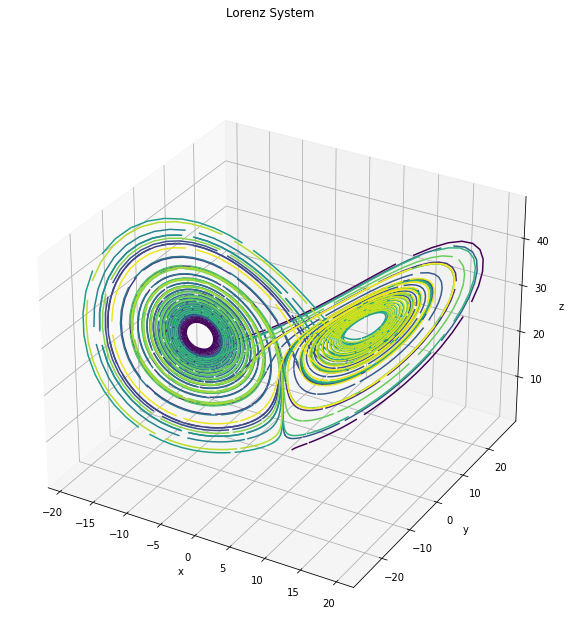

In [4]:
fig = plt.figure(figsize=[10,10])
fig.suptitle("Lorenz System")
ax = fig.add_subplot(projection='3d')
ax.set(xlabel='x',ylabel='y',zlabel='z')
j = 10

viridis = cm.get_cmap('viridis', N).colors

for i in range(0,N,j):
    ax.plot(r[i:i+j,0],r[i:i+j,1],r[i:i+j,2],color=viridis[i])


In [5]:
! mkdir -p data
np.save("./data/lorenz_r",r)
np.save("./data/lorenz_t",t)

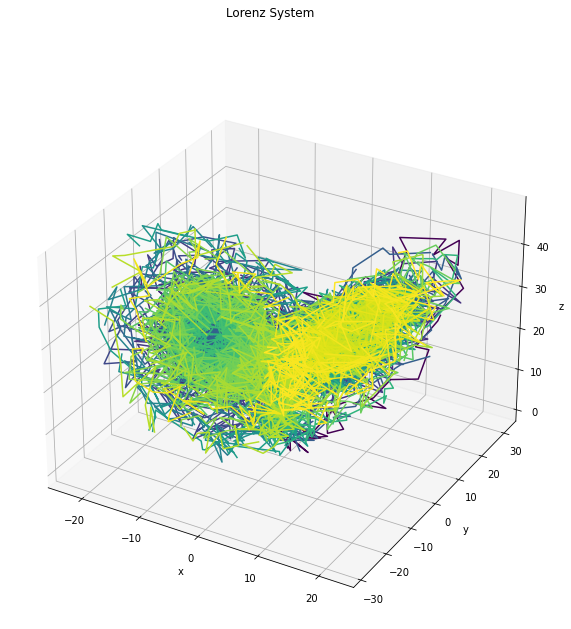

In [6]:
# NOISY SYSTEM

noise_scale = 2
r_noisy = r + np.random.normal(0,noise_scale,size=r.shape)

fig = plt.figure(figsize=[10,10])
fig.suptitle("Lorenz System")
ax = fig.add_subplot(projection='3d')
ax.set(xlabel='x',ylabel='y',zlabel='z')
j = 10

viridis = cm.get_cmap('viridis', N).colors

for i in range(0,N,j):
    ax.plot(r_noisy[i:i+j,0],r_noisy[i:i+j,1],r_noisy[i:i+j,2],color=viridis[i])

In [7]:
! mkdir -p data
np.save("./data/lorenz_r_noisy",r)

## Rössler

Now to generate data with another dynamical system:

$$

\begin{cases}
\dot{x} = -y -z \\ 
\dot{y} = x+ay \\
\dot{z} = b + z(x-c)
\end{cases}

$$



In [7]:
def rossler(r,t,a,b,c):
    """
    Function to implement the Rossler system of differential equation. Takes in two arguments:
    r : array of 3 floats representing (x,y,z)
    t : float for time value; unused by the Lorenz system but here for scipy compatibility.
    a :
    b :
    c : parameters (float)
    Returns:
    drdt : velocity vector
    """
    x,y,z = r
    return np.array([-y-z,x + a*y,b+z*(x-c)])

a = 0.1
b = a
c = 14

r0 = np.ones(3)

N = 10000
T = 100

t = np.linspace(0,T,N)

r,info = odeint(rossler,r0,t,args=(a,b,c),full_output=True) # output is like (N,3)

In [8]:
fig = plt.figure(figsize=[10,10])
fig.suptitle("Rossler System")
ax = fig.add_subplot(projection='3d')
ax.set(xlabel='x',ylabel='y',zlabel='z')
j = 10

viridis = cm.get_cmap('plasma', N).colors

for i in range(0,N,j):
    ax.plot(r[i:i+j,0],r[i:i+j,1],r[i:i+j,2],color=viridis[i])

In [9]:
! mkdir -p data
np.save("./data/rossler_r",r)
np.save("./data/rossler_t",t)

# "Adiabatic" transforming system

Now imagine we have a differential equations system whose parameters $\boldsymbol{\Lambda} = \boldsymbol{\Lambda}(t)$ slowly evolve through time. Let's also suppose that these parameters start out in such a way that the resulting system is a Lorenz system, and the final one is a Rössler system:

$$
\begin{bmatrix}
\frac{\partial x}{\partial t} \\
\frac{\partial y}{\partial t} \\
\frac{\partial z}{\partial t}
\end{bmatrix}
=
\boldsymbol{\Lambda}(t)
\begin{bmatrix}
1 \\
x \\
y \\
z \\
xy \\
yz \\
zx
\end{bmatrix}
=

\begin{bmatrix}
\lambda_{x,1} (t) & \lambda_{x,x} (t) & \lambda_{x,y} (t) & \lambda_{x,z} (t) & \lambda_{x,xy}(t) & \lambda_{x,yz}(t) & \lambda_{x,zx}(t) \\
\lambda_{y,1} (t) &\lambda_{y,x} (t) & \lambda_{y,y} (t) & \lambda_{y,z} (t) & \lambda_{y,xy}(t) & \lambda_{y,yz}(t) & \lambda_{y,zx}(t)\\
\lambda_{z,1} (t) &\lambda_{z,x} (t) & \lambda_{z,y} (t) & \lambda_{z,z} (t) &  \lambda_{z,xy}(t) & \lambda_{z,yz}(t) & \lambda_{z,zx}(t) 
\end{bmatrix}

\begin{bmatrix}
1 \\
x \\
y \\
z \\
xy \\
yz \\
zx
\end{bmatrix}
$$

with 

$$
\boldsymbol{\Lambda}(0) = 
\begin{bmatrix}
0&-\sigma  & \sigma  & 0 & 0 & 0 & 0 \\
0&\rho & -1  & -\rho & 0 & 0 & 0\\
0&0 & 0 & -\beta & 1 & 0 & 0 
\end{bmatrix}

$$

and, since the Rössler is defined as 

$$

\begin{cases}
\dot{x} = -y -z \\ 
\dot{y} = x+ay \\
\dot{z} = b + z(x-c)
\end{cases}

$$

The parametrization at time $T$ will be

$$
\boldsymbol{\Lambda}(T) = 
\begin{bmatrix}
0&0  & -1  & -1 & 0 & 0 & 0 \\
0&1 & a  & 0 & 0 & 0 & 0\\
b&0 & 0 & -c & 0 & 0 & 1 
\end{bmatrix}
$$

Finally, we let this change be linear with time, i.e.:

$$
\boldsymbol{\Lambda}(t) = \boldsymbol{\Lambda}(0) + \frac{\boldsymbol{\Lambda}(T) - \boldsymbol{\Lambda}(0)}{T} t
$$


The goal is to later feed time windowed subsets of this system to the SINDy algorithm and evaluate the tradeoff on the uncertainty between a large and a small time window.

In [41]:
def lt(t,l0,lT,T):
    print((l0 + t*(lT-l0)/T).shape)
    return (l0 + t*(lT-l0)/T)

# now we define the initial parametrization corresponding to the lorenz system

sigma = 10
rho = 28
beta = 8/3

l0 = np.array([
    [0.,-sigma,sigma,0.,0.,0.,0.],
    [0.,rho,-1.,-rho,0.,0.,0.],
    [0.,0.,0.,-beta,1.,0.,0.]
])

# and the final parametrization

a = 0.1
b = 0.1
c = 14.

lT = np.array([
    [0.,0.,-1.,-1.,0.,0.,0.],
    [0.,1.,a,0.,0.,0.,0.],
    [b,0.,0.,-c,0.,0.,1.]
])

Tad = T

li=np.expand_dims(l0,axis=0)

for ti in t:
    li = np.concatenate(    (li,np.expand_dims(lt(ti,l0,lT,Tad),axis=0)),axis=0   )

li.shape



(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)


(11, 3, 7)

In [42]:
li2 = li.reshape(li.shape[0],-1)

fig,ax=plt.subplots()
for i in range(li2.shape[1]):
    ax.plot(li2[:,i])

plt.show()

In [43]:
def linear_adiabatic_system(r,t,l0,lT,T):
    """
    Function to implement the adiabatic-transforming system of differential equation.  
    Arguments:
    r : array of 3 floats representing (x,y,z)
    t : float for time value
    l0 : np.array() shaped like (3,7) representing the initial parametrization
    lT : np.array() shaped like (3,7) representing the final parametrization
    T : transformation time duration
    Returns:
    drdt : velocity vector
    """
    
    vec = np.array([1.,r[0],r[1],r[2],r[0]*r[1],r[1]*r[2],r[2]*r[0]])

    return (lt(t,l0,lT,T) @ vec)

In [44]:
# COMPLETELY BROKEN

r0 = 2*np.random.random(3)

N = 10
T = 1000

Tad = T*10

t = np.linspace(0,T,N)

r,info = odeint(linear_adiabatic_system,r0,t,args=(l0,lT,Tad),full_output=1) # output is like (N,3)

(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)
(3, 7)

/home/zano/anaconda3/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [45]:
r

array([[ 9.16326097e-03,  1.88143415e+00,  1.36610838e+00],
       [-2.85126727e+11, -1.34031276e+16,  2.68823685e+20],
       [ 1.44720000e+02,  1.44720000e+02,  1.44720000e+02],
       [ 2.43556364e+02,  1.45072987e+02,  1.44720000e+02],
       [ 1.44720000e+02,  1.44720000e+02,  1.44720000e+02],
       [ 1.45072987e+02,  1.44720000e+02,  1.44720000e+02],
       [ 1.35307013e+02,  1.48249870e+02,  1.44720000e+02],
       [ 1.48249870e+02,  2.53440000e+02,  2.53440000e+02],
       [ 3.60000000e+01,  2.53440000e+02,  2.90000000e+01],
       [ 2.54616104e+02,  2.53440000e+02,  2.54616104e+02]])

In [46]:
fig = plt.figure(figsize=[10,10])
fig.suptitle("Adiabatic System")
ax = fig.add_subplot(projection='3d')
ax.set(xlabel='x',ylabel='y',zlabel='z')
ax.plot(r[:,0],r[:,1],r[:,2])